# Notes on Modulation

The purpose of the document is to lay out the mapping, LLR formulations associated with modulation/demodulation.

## 1. BPSK

Binary Phase Shift Keying Modulation (BPSK) is the most basic modulation scheme. While it's still used for some applications, more modern applications do not use it as much. Especially with the 6G over the horizon, mega constellations are being pursued.

### BPSK Mapping

In [35]:
bpsk_mapping = {
    0 : 1,
    1: -1
}

The Log-Likelihood Ratio (LLR) computation associated with BPSK is as follows:


$$
\text{LLR} = \ln \left( \frac{P(y \mid x = +1)}{P(y \mid x = -1)} \right) %= \frac{2y}{\sigma^2}
$$

where $P(y \mid x)$ is expressed as:

$$P(y \mid x) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{(y-x)^2}{2\sigma^2}}$$

Substitute the probability into the LLR comptuation:

$$ \text{LLR} = \ln \left( \frac{e^{-\frac{(y-1)^2}{2\sigma^2}}}{e^{-\frac{(y+1)^2}{2\sigma^2}}} \right) %= \frac{2y}{\sigma^2} $$

$$ \text{LLR} = \ln \left( e^{-\frac{(y-1)^2}{2\sigma^2}+\frac{(y+1)^2}{2\sigma^2}} \right) $$

$$ \text{LLR} = \frac{-(y-1)^2 + (y+1)^2}{2\sigma^2} $$

$$ \text{LLR} = \frac{(-y^2 +2y -1) + (y^2 + 2y +1)}{2\sigma^2} $$

$$ \text{LLR} = \frac{4y}{2\sigma^2} = \frac{2y}{\sigma^2} $$

In Python, the LLR for BPSK can be computed as follows.

In [36]:
def compute_llr_bpsk(received_symbols, noise_variance):
    """
    Compute LLRs for BPSK symbols.

    Args:
        received_symbols (np.ndarray): Received symbols (real-valued).
        noise_variance (float): Noise variance (sigma^2).

    Returns:
        np.ndarray: LLRs for each bit.
    """
    scaling_factor = 2 / noise_variance
    return scaling_factor * received_symbols

In [37]:
import numpy as np
received_symbols = np.array([-3, -1.1, 4.1, -0.5])
noise_variance = 0.5
print("LLRs of the received symbols" , received_symbols, "is", compute_llr_bpsk(received_symbols, noise_variance))

LLRs of the received symbols [-3.  -1.1  4.1 -0.5] is [-12.   -4.4  16.4  -2. ]


## 2. QPSK

Let’s carefully break down the full computation of the LLR for QPSK and how it simplifies under certain assumptions.

### 2.1. Starting with the Full LLR Formula

For each bit b, the LLR is:

$$\text{LLR} = \ln \left( \frac{\sum_{s \in \mathcal{S}_0} P(y \mid s)}{\sum_{s \in \mathcal{S}_1} P(y \mid s)} \right)$$

where:

* $\mathcal{S}_0$ is the set of constellation points where $b=0$.
* $\mathcal{S}_1$ is the set of constellation points where $b=1$.
* $P(y \mid s)$ is $\frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{(y-s)^2}{2\sigma^2}}$ assuming AWGN.


For simplicity, the constant $\frac{1}{\sqrt{2\pi \sigma^2}}$ cancels out because it appears in both numerator and denominator:

$$\text{LLR} = \ln \left( \frac{\sum_{s \in \mathcal{S}_0} e^{-\frac{(y-s)^2}{2\sigma^2}}}{\sum_{s \in \mathcal{S}_1} e^{-\frac{(y-s)^2}{2\sigma^2}}} \right)$$

### 2.2. Apply QPSK Constellation

For QPSK, the constellation is as follows:

$\mathcal{S} = {+1+j, +1-j, -1+j, -1-j}$

Each bit corresponds to either the real part ($b_1$) or the imaginary part ($b_2$) of the received symbol.

*LLR for $b_1$ : In-Phase (Real Part)*

The in-phase bit $b_1$ is determined by the real axis:

* $b_1 = 0$: Points: {+1+j, +1-j}
* $b_1 = 1$: Points: {-1+j, -1-j}

$$\text{LLR}_{b_1} = \ln \left( \frac{ e^{-\frac{\mid y-(+1+j)\mid^2}{2\sigma^2}} + e^{-\frac{\mid y-(+1-j)\mid^2}{2\sigma^2}}}{e^{-\frac{\mid y-(-1+j) \mid^2}{2\sigma^2}} + e^{-\frac{\mid y-(-1-j)\mid^2}{2\sigma^2}}} \right)$$


*LLR for $b_2$ : Quadrature (Imaginary Part)*

The quadrature bit $b_2$ is determined by the imaginary axis:

* $b_2 = 0$: Points: {+1+j, -1+j}
* $b_2 = 1$: Points: {+1-j, -1-j}

$$\text{LLR}_{b_2} = \ln \left( \frac{ e^{-\frac{\mid y-(+1+j)\mid^2}{2\sigma^2}} + e^{-\frac{\mid y-(-1+j)\mid^2}{2\sigma^2}}}{e^{-\frac{\mid y-(+1-j) \mid^2}{2\sigma^2}} + e^{-\frac{\mid y-(-1-j)\mid^2}{2\sigma^2}}} \right)$$

### 2.3. Simplify the Distance Metric

Each term $∣y−s∣^2$ can be expanded:

$ ∣y−s∣^2 = (y_I-s_I)^2 + (y_Q-s_Q)^2$

For each subset of points:
* $b_1$ : Only the real part $y_I$ contributes to differentiating ​$b_1$. The imaginary part $y_Q$ is identical for points within each subset.
* $b_2$ : Only the imaginary part $y_Q$ contributes to differentiating ​$b_2$. The real part $y_I$ is identical for points within each subset.

Thus, for $b_1$, the LLR simplifies to:
$$\text{LLR}_{b_1} = \ln \left( \frac{ e^{-\frac{\mid y_I-1\mid^2}{2\sigma^2}} + e^{-\frac{\mid y_I-1\mid^2}{2\sigma^2}}}{e^{-\frac{\mid y_I+1 \mid^2}{2\sigma^2}} + e^{-\frac{\mid y_I+1\mid^2}{2\sigma^2}}} \right)$$

In both sides of the fraction, the terms are repeated twice. Simplifying further:

$$\text{LLR}_{b_1} = \ln \left( \frac{ e^{-\frac{\mid y_I-1\mid^2}{2\sigma^2}}}{e^{-\frac{\mid y_I+1\mid^2}{2\sigma^2}}} \right)$$

$$\text{LLR}_{b_1} =  -\frac{\mid y_I-1\mid^2}{2\sigma^2} + \frac{\mid y_I+1\mid^2}{2\sigma^2}$$

$$\text{LLR}_{b_1} =  \frac{- y_I^2 -2y_I +1 +  y_I^2 +2y_I +1}{2\sigma^2}$$

$$\text{LLR}_{b_1} =  \frac{ 4y_I}{\sigma^2} = \frac{ 2y_I}{\sigma^2}$$ 

Similarly for $b_2$, it simplifies to:

$$\text{LLR}_{b_2} = \frac{ 2y_Q}{\sigma^2}$$ 

After all, the LLR computation for QPSK is not too different than the BPSK version, except the real and imaginary parts are involved now.

To illustrate this simplification further, below is the code that plots both LLR distributions using the non-simplified form, and from the results it can be visually observed that the LLR calculations is pretty straightforward for QPSK constellation.

In [48]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Parameters
sigma2 = 0.5  # Noise variance
y_real = np.linspace(-2, 2, 100)  # Real axis range
y_imag = np.linspace(-2, 2, 100)  # Imaginary axis range
Y_real, Y_imag = np.meshgrid(y_real, y_imag)  # Create 2D grid for constellation surface
Y = Y_real + 1j * Y_imag  # Combine into complex grid

# QPSK constellation points
constellation = np.array([1+1j, 1-1j, -1+1j, -1-1j])

# LLR formula for b1
num_b1 = np.exp(-np.abs(Y - (1+1j))**2 / (2 * sigma2)) + np.exp(-np.abs(Y - (1-1j))**2 / (2 * sigma2))
den_b1 = np.exp(-np.abs(Y - (-1+1j))**2 / (2 * sigma2)) + np.exp(-np.abs(Y - (-1-1j))**2 / (2 * sigma2))
LLR_b1 = np.log(num_b1 / den_b1)
num_b2 = np.exp(-np.abs(Y - (1+1j))**2 / (2 * sigma2)) + np.exp(-np.abs(Y - (-1+1j))**2 / (2 * sigma2))
den_b2 = np.exp(-np.abs(Y - (1-1j))**2 / (2 * sigma2)) + np.exp(-np.abs(Y - (-1-1j))**2 / (2 * sigma2))
LLR_b2 = np.log(num_b2 / den_b2)


# Create a custom colormap: Red near 0, Green at extremes
cmap = mcolors.LinearSegmentedColormap.from_list("CustomMap", ["green", "red", "green"])

# Normalize LLR values to control the color range
norm = mcolors.Normalize(vmin=np.min(LLR_b1.real), vmax=np.max(LLR_b1.real))

# Plotting with the custom colormap
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(Y_real, Y_imag, LLR_b1.real, cmap=cmap, edgecolor='none', norm=norm)
surface = ax.plot_surface(Y_real, Y_imag, LLR_b2.real, cmap=cmap, edgecolor='none', norm=norm)

# Add colorbar
cbar = plt.colorbar(surface, ax=ax, shrink=0.7)
cbar.set_label("LLR Value", fontsize=12)

# Labels and title
ax.set_title("3D Plot of LLR for $b_1$ and $b_2$ in QPSK (Custom Colormap)", fontsize=16)
ax.set_xlabel("Real Part (Re(y))", fontsize=12)
ax.set_ylabel("Imaginary Part (Im(y))", fontsize=12)
ax.set_zlabel("LLR Value", fontsize=12)

plt.show()


<IPython.core.display.Javascript object>

The code above is self-contained, feel free to copy and paste it to a py file and play around. 

The plot looks like the following. The LLR value is represented over the constellation map. 

The image is created using the following formulations, before the simplifications:

$$\text{LLR}_{b_1} = \ln \left( \frac{ e^{-\frac{\mid y-(+1+j)\mid^2}{2\sigma^2}} + e^{-\frac{\mid y-(+1-j)\mid^2}{2\sigma^2}}}{e^{-\frac{\mid y-(-1+j) \mid^2}{2\sigma^2}} + e^{-\frac{\mid y-(-1-j)\mid^2}{2\sigma^2}}} \right)$$

$$\text{LLR}_{b_2} = \ln \left( \frac{ e^{-\frac{\mid y-(+1+j)\mid^2}{2\sigma^2}} + e^{-\frac{\mid y-(-1+j)\mid^2}{2\sigma^2}}}{e^{-\frac{\mid y-(+1-j) \mid^2}{2\sigma^2}} + e^{-\frac{\mid y-(-1-j)\mid^2}{2\sigma^2}}} \right)$$

It can be seen from the figure that these functions are in fact linear, and matches to the simplified LLR calculation of $2y/\sigma^2$.

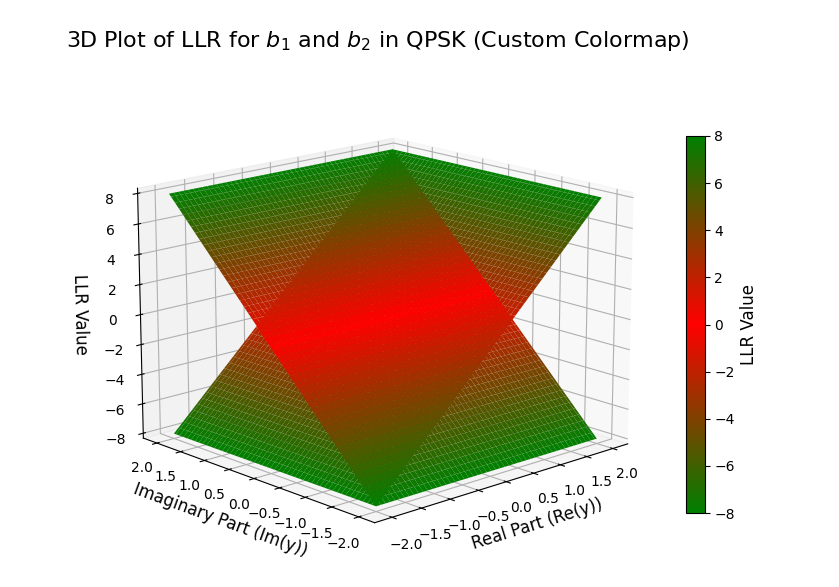